# Food Delivery Time Prediction Project

## Project Overview
This project aims to develop a machine learning model to predict food delivery times based on various features such as delivery person ratings, weather conditions, and distance between the restaurant and delivery location. Accurate prediction of delivery times is crucial for optimizing delivery operations, improving customer satisfaction, and enhancing overall efficiency.

## Objectives
- **Predict Delivery Times:** Build a predictive model to estimate the time taken for food delivery.
- **Evaluate Model Performance:** Compare various machine learning models to select the most accurate one.
- **Improve Operations:** Utilize predictions to optimize delivery scheduling and resource allocation.

## Dataset
- **Source:** Kaggle
- **Columns:** The dataset includes columns such as:
  - `Delivery_person_Age`
  - `Delivery_person_Ratings`
  - `Restaurant_latitude`
  - `Restaurant_longitude`
  - `Delivery_location_latitude`
  - `Delivery_location_longitude`
  - `Weather_conditions`
  - `Road_traffic_density`
  - `Type_of_order`
  - `Type_of_vehicle`
  - `multiple_deliveries`
  - `Festival`
  - `City`
  - `Time_taken(min)`

## Approach
1. **Data Preprocessing:**
   - Handle missing values and outliers.
   - Encode categorical variables.
   - Feature scaling and transformation.
   
2. **Model Training:**
   - Train and evaluate multiple machine learning models including Linear Regression, Decision Tree Regressor, Random Forest Regressor, and XGBoost Regressor.
   - Select the best-performing model based on evaluation metrics.

3. **Model Evaluation:**
   - Assess model performance using R-squared (R²) score and other relevant metrics.
   - Compare predictions with actual delivery times.



This markdown block provides a comprehensive overview of the project's goals, dataset, methodology, and anticipated outcomes, setting the stage for the code that follows.


### 1. Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
!pip install haversine
from haversine import haversine, Unit

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

### 2. Loading the Data

In [9]:
df = pd.read_csv(r'C:\Users\Dhruv Rathi\Desktop\Delivery-time\archive\Delivery Data.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


### 3. Understand the Data

In [11]:
# Checking the shape of the dataset
df.shape

(45593, 20)

In [12]:
# Checking for null values
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [13]:
# Getting some information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [14]:
# Checking the Descriptive Statistics of the Dataset
df.describe(include='all')

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
count,45593,45593,45593,45593,45593.000000,45593.000000,45593.000000,45593.000000,45593,45593,45593,45593,45593,45593.000000,45593,45593,45593,45593,45593,45593
unique,45593,1320,23,29,NaN,NaN,NaN,NaN,44,177,193,7,5,NaN,4,4,5,3,4,45
top,0x4607,PUNERES01DEL01,35,4.8,NaN,NaN,NaN,NaN,15-03-2022,NaN,21:30:00,conditions Fog,Low,NaN,Snack,motorcycle,1,No,Metropolitian,(min) 26
freq,1,67,2262,7148,NaN,NaN,NaN,NaN,1192,1731,496,7654,15477,NaN,11533,26435,28159,44469,34093,2123
mean,NaN,NaN,NaN,NaN,17.017729,70.231332,17.465186,70.845702,NaN,NaN,NaN,NaN,NaN,1.023359,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,8.185109,22.883647,7.335122,21.118812,NaN,NaN,NaN,NaN,NaN,0.839065,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-30.905562,-88.366217,0.010000,0.010000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,12.933284,73.170000,12.988453,73.280000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,18.546947,75.898497,18.633934,76.002574,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,22.728163,78.044095,22.785049,78.107044,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Explore each column
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("------------------------------------")

ID
ID
0x4607     1
0x1f3e     1
0xe251     1
0x3f31     1
0x4a78     1
          ..
0xc3f1     1
0x5db7     1
0x1985     1
0xceda     1
0x5fb2     1
Name: count, Length: 45593, dtype: int64
------------------------------------
Delivery_person_ID
Delivery_person_ID
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: count, Length: 1320, dtype: int64
------------------------------------
Delivery_person_Age
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: count, dtype: int64
------------------------------------
Delivery_perso

### 4. Data Cleaning

In [17]:
# Update Column Names

def update_column_name(df):
    #Renaming Weatherconditions column
    df.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)
    
update_column_name(df)
print(df.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [18]:
# Extract relevant values from column

def extract_column_value(df):
    #Extract time and convert to int
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
    #Extract Weather conditions
    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    #Extract city code from Delivery person ID
    df['City_code']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]
    
extract_column_value(df)
df[['Time_taken(min)','Weather_conditions','City_code']].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [19]:
# Drop Columns which won't be use for building model

def drop_columns(df):
    df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)
    
print("Before No. of columns: ",df.shape[1])
drop_columns(df)
print("After No. of columns: ",df.shape[1])

Before No. of columns:  21
After No. of columns:  19


In [20]:
# Check for Duplicate Values

if (len(df[df.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [21]:
# Update datatypes

def update_datatype(df):
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")
    
update_datatype(df)

In [22]:
# Convert String 'NaN' to np.nan

def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df)

In [23]:
# Again checking for null values

df.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weather_conditions              616
Road_traffic_density            601
Festival                        228
Order_Date                        0
Delivery_location_longitude       0
Time_Order_picked                 0
Delivery_location_latitude        0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken(min)                   0
City_code                         0
dtype: int64

In [24]:
# Handle null values

def handle_null_values(df):
    df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean(), inplace=True)
    df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions']), inplace=True)
    df['City'].fillna(df['City'].mode()[0], inplace=True)
    df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)
    
handle_null_values(df)
df.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
City_code                         0
dtype: int64

In [25]:
# Checking The Descriptive Statistics again
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Vehicle_condition,multiple_deliveries,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593,45593.000000,45593.000000,45593.000000
mean,29.567137,4.636552,17.017729,70.231332,17.465186,70.845702,2022-03-13 16:32:53.987235072,1.023359,0.750225,26.294607
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,2022-02-11 00:00:00,0.000000,0.000000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,2022-03-04 00:00:00,0.000000,0.000000,19.000000
50%,29.567137,4.700000,18.546947,75.898497,18.633934,76.002574,2022-03-15 00:00:00,1.000000,1.000000,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,2022-03-27 00:00:00,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,3.000000,3.000000,54.000000
std,5.695692,0.327906,8.185109,22.883647,7.335122,21.118812,NaN,0.839065,0.567430,9.383806


In [26]:
# Number of observations with delivery rating as 6
df[df['Delivery_person_Ratings'] == 6].shape[0]

53

In [27]:
# Shape before getting rid off observations with ratings as 6

df.shape

(45593, 19)

In [28]:
# Getting rid off the Deliver_person_Ratings greater than 5, assuming it to be a data entry error

df_cleaned = df[df['Delivery_person_Ratings'] <= 5]

In [29]:
df_cleaned.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN


In [30]:
# Shape of the dataset after getting rid off the observations with ratings as 6

df_cleaned.shape

(45540, 19)

In [31]:
# Reconfirming the updated Delivery_person_Ratings

df_cleaned.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Vehicle_condition,multiple_deliveries,Time_taken(min)
count,45540.000000,45540.000000,45540.000000,45540.000000,45540.000000,45540.000000,45540,45540.000000,45540.000000,45540.000000
mean,29.543357,4.634965,17.036839,70.303086,17.466449,70.848923,2022-03-13 16:38:59.288537600,1.021058,0.750395,26.297343
min,15.000000,1.000000,-30.905562,-88.352885,0.010000,0.010000,2022-02-11 00:00:00,0.000000,0.000000,10.000000
25%,25.000000,4.600000,12.933284,73.170283,12.988453,73.280000,2022-03-04 00:00:00,0.000000,0.000000,19.000000
50%,29.567137,4.700000,18.551440,75.898497,18.633934,76.002574,2022-03-15 00:00:00,1.000000,1.000000,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.105546,2022-03-27 00:00:00,2.000000,1.000000,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,3.000000,3.000000,54.000000
std,5.656164,0.324779,8.146609,22.665217,7.333616,21.111197,NaN,0.836837,0.567454,9.384483


### 5. Feature Engineering

In [33]:
# extracting the features from Order_Date column

def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_cleaned)
df_cleaned.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [34]:

def calculate_time_diff(df):
    # Ensure 'Order_Date' is in datetime format
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])

    # Convert the 'Time_Orderd' and 'Time_Order_picked' columns to timedelta
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])
    
    # Calculate the complete datetime for when the order was placed and picked
    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']
    df['Time_Order_picked_formatted'] = df['Order_Date'] + df['Time_Order_picked']

    # Adjust 'Time_Order_picked_formatted' if the picking time is on the next day
    # This is needed if 'Time_Order_picked' is less than 'Time_Orderd' (e.g., order at 23:50 and picked at 00:10 next day)
    df['Time_Order_picked_formatted'] = np.where(
        df['Time_Order_picked'] < df['Time_Orderd'], 
        df['Time_Order_picked_formatted'] + pd.DateOffset(days=1), 
        df['Time_Order_picked_formatted']
    )
    
    # Calculate the order preparation time in minutes
    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60
    
    # Handle missing values in 'order_prepare_time' by filling with the median value
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)
    
    # Drop all the time & date related columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], axis=1, inplace=True)


In [35]:
calculate_time_diff(df_cleaned)

In [36]:
df_cleaned.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,2022,4,0,0,0,0,0,0,0,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,2022,5,0,0,0,0,0,0,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,2022,1,0,0,0,0,0,0,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,2022,5,0,0,0,0,0,0,1,15.0


In [37]:
#Function to Calculate the distance between Restaurant and the Delivery location

def calculate_distance(row):
    rest_coords = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    deliv_coords = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return round(haversine(rest_coords, deliv_coords, unit=Unit.KILOMETERS),0)

In [38]:
# Applying the function to the data
df_cleaned['Distance_km'] = df_cleaned.apply(calculate_distance, axis=1)

# Updated Data
df_cleaned.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Distance_km
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,2.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,8.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6.0


In [39]:
# Checking the descriptive Statistics of the new column 'Distance_km'

df_cleaned['Distance_km'].describe()

# We can observe the 'Distance_km' is highly skewed

count    45540.000000
mean        91.542161
std       1036.494793
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max      19688.000000
Name: Distance_km, dtype: float64

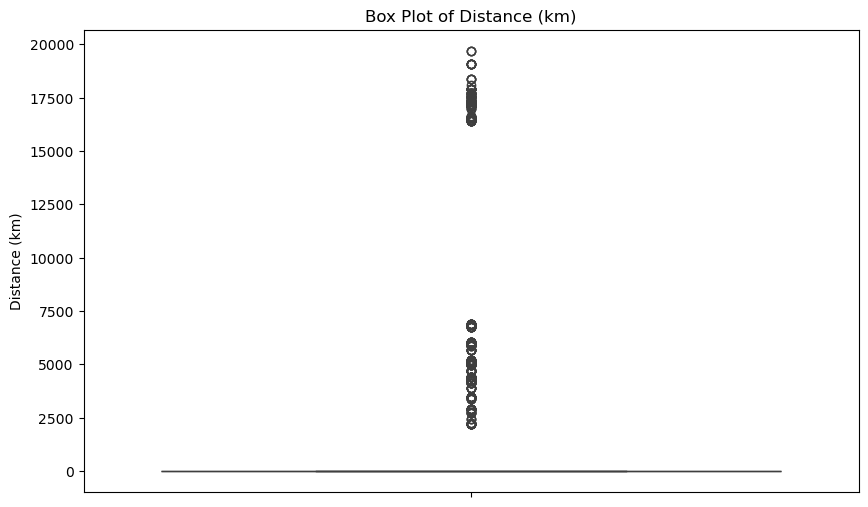

In [40]:
# Boxplot of Distance_km column before treating the outliers

plt.figure(figsize=(10, 6))
sns.boxplot(y='Distance_km', data=df_cleaned)
plt.title('Box Plot of Distance (km)')
plt.ylabel('Distance (km)')
plt.show()

In [41]:
# Calculating the Quartile 1 and Quartile 3 for treating the outliers
Q1 = df_cleaned['Distance_km'].quantile(0.25)
Q3 = df_cleaned['Distance_km'].quantile(0.75)

# Inter-Quartile Range
IQR = Q3 - Q1

# Calculating the lower most and upper most value of the considerable range 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [42]:
# Filter the observations outside the IQR range
outliers = df_cleaned[(df_cleaned['Distance_km'] < lower_bound) | (df_cleaned['Distance_km'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]
print(num_outliers)

409


In [43]:
# Getting rid off the outliers
df_cleaned = df_cleaned[(df_cleaned['Distance_km'] >= lower_bound) & (df_cleaned['Distance_km'] <= upper_bound)]

In [44]:
# Shape of the dataset after getting rid off the outliers

df_cleaned.shape

(45131, 30)

In [45]:
# Checking the Descriptive Statistics after getting rid off the outliers

df_cleaned['Distance_km'].describe()

count    45131.000000
mean         9.781702
std          5.557972
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         21.000000
Name: Distance_km, dtype: float64

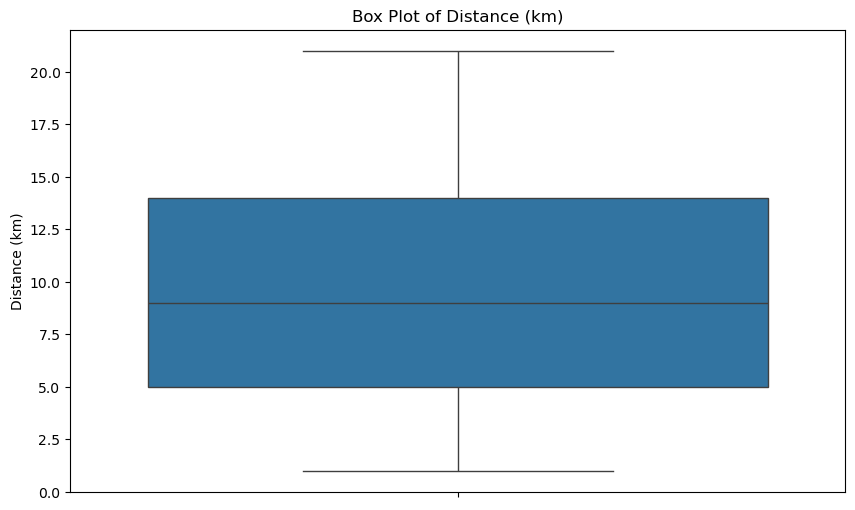

In [46]:
# Boxplot of Distance_km column after treating the outliers

plt.figure(figsize=(10, 6))
sns.boxplot(y='Distance_km', data=df_cleaned)
plt.title('Box Plot of Distance (km)')
plt.ylabel('Distance (km)')
plt.show()

In [47]:
df_cleaned.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'City_code', 'day', 'month', 'quarter', 'year',
       'day_of_week', 'is_month_start', 'is_month_end', 'is_quarter_start',
       'is_quarter_end', 'is_year_start', 'is_year_end', 'is_weekend',
       'order_prepare_time', 'Distance_km'],
      dtype='object')

In [48]:
# list of Columns which are redundant

cols_to_del = [ 'Restaurant_latitude','Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude']

In [49]:
# Getting rid off the redundant columns

df_cleaned.drop(columns=cols_to_del,inplace=True)

In [50]:
df_cleaned.shape

(45131, 26)

In [51]:
df_cleaned.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Distance_km
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,...,5,0,0,0,0,0,0,1,15.0,3.0
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,...,4,0,0,0,0,0,0,0,5.0,20.0
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,...,5,0,0,0,0,0,0,1,15.0,2.0
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,...,1,0,0,0,0,0,0,0,10.0,8.0
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,...,5,0,0,0,0,0,0,1,15.0,6.0


### 6. Data Visualizations

In [95]:
df_cleaned.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'City_code', 'day', 'month', 'quarter', 'year',
       'day_of_week', 'is_month_start', 'is_month_end', 'is_quarter_start',
       'is_quarter_end', 'is_year_start', 'is_year_end', 'is_weekend',
       'order_prepare_time', 'Distance_km'],
      dtype='object')

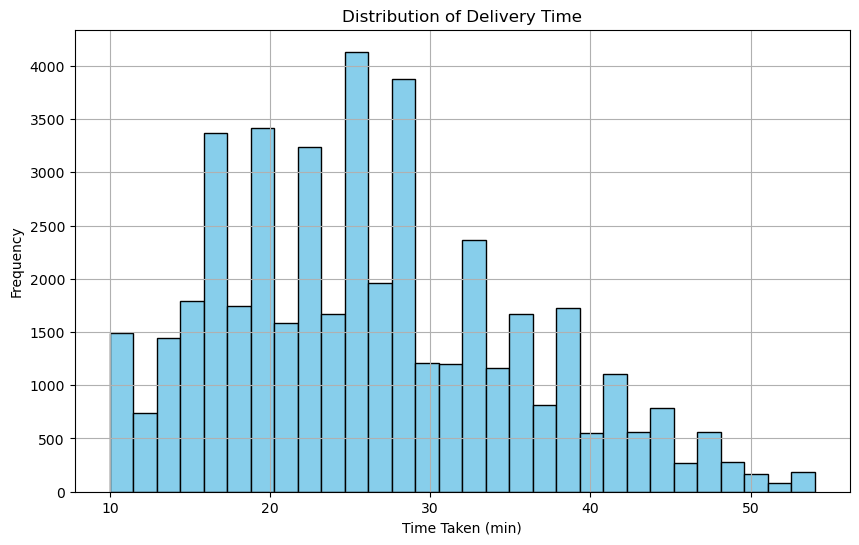

In [97]:
# Histogram of Delivery Time
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Time_taken(min)'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Time')
plt.xlabel('Time Taken (min)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

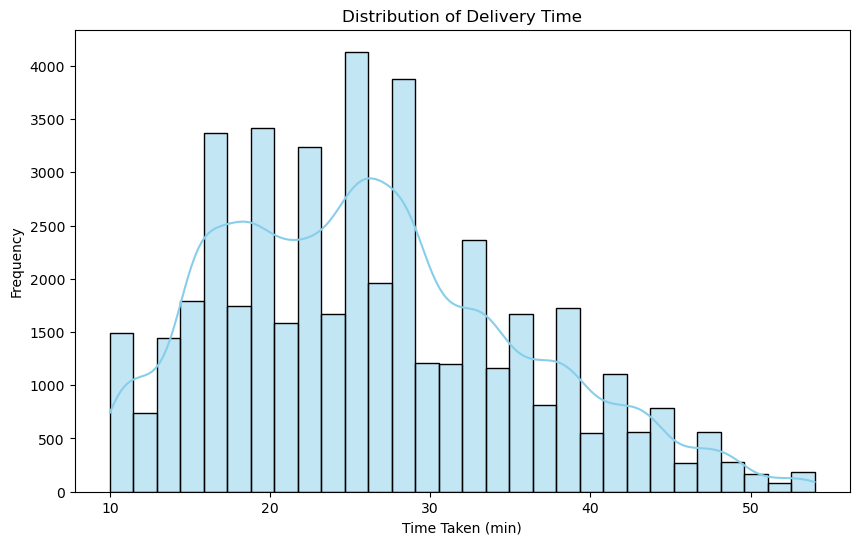

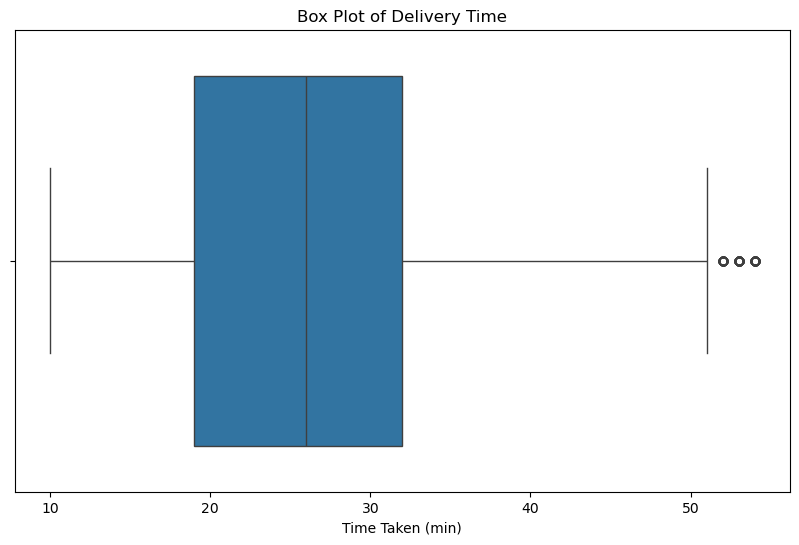

In [99]:
# Checking the Distribution of delivery time
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Time_taken(min)'], bins=30, kde=True,color='skyblue')
plt.title('Distribution of Delivery Time')
plt.xlabel('Time Taken (min)')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Time_taken(min)'])
plt.title('Box Plot of Delivery Time')
plt.xlabel('Time Taken (min)')
plt.show()

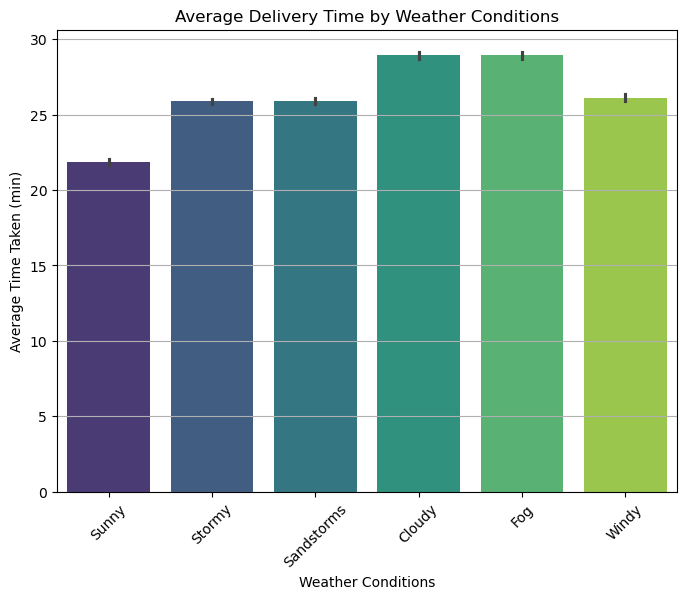

In [101]:
# Plot for Average Delivery Time based of Weather Conditions
plt.figure(figsize=(8, 6))
sns.barplot(x='Weather_conditions', y='Time_taken(min)', data=df_cleaned, palette='viridis')
plt.title('Average Delivery Time by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Time Taken (min)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

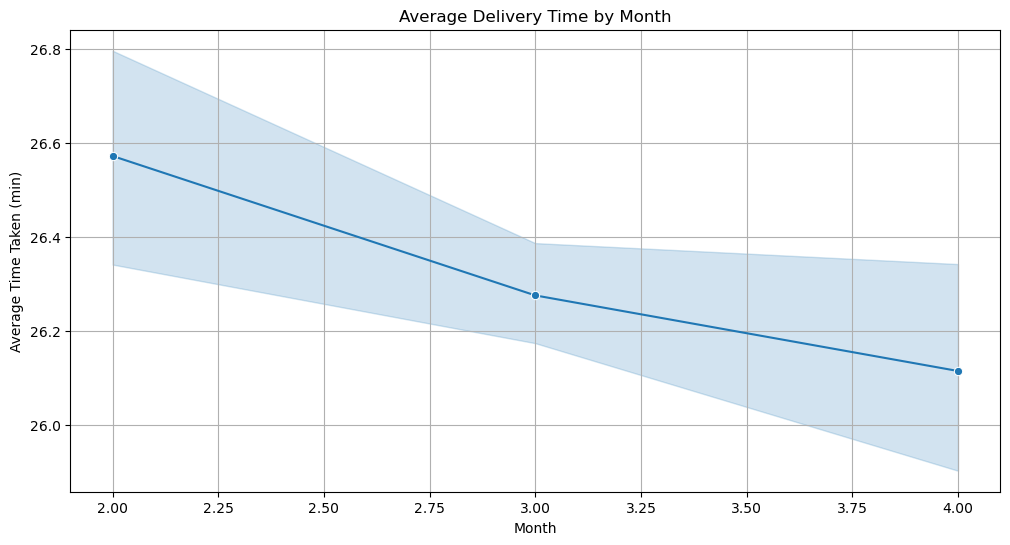

In [103]:
# Line Chart for Average Delivery by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Time_taken(min)', data=df_cleaned, marker='o')
plt.title('Average Delivery Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Time Taken (min)')
plt.grid(True)
plt.show()

# {2 : 'February', 3 : 'March', 4 : 'April'}

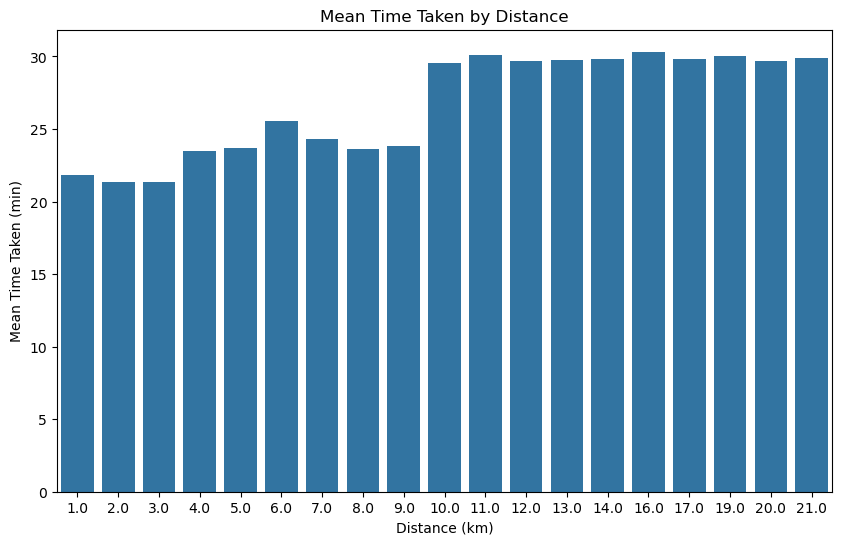

In [143]:
# Bar Plot for Mean time taken vs Distance
plt.figure(figsize=(10, 6))
sns.barplot(x='Distance_km', y='Time_taken(min)', data=df_cleaned, estimator=np.mean, ci=None)
plt.title('Mean Time Taken by Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Mean Time Taken (min)')
plt.show()

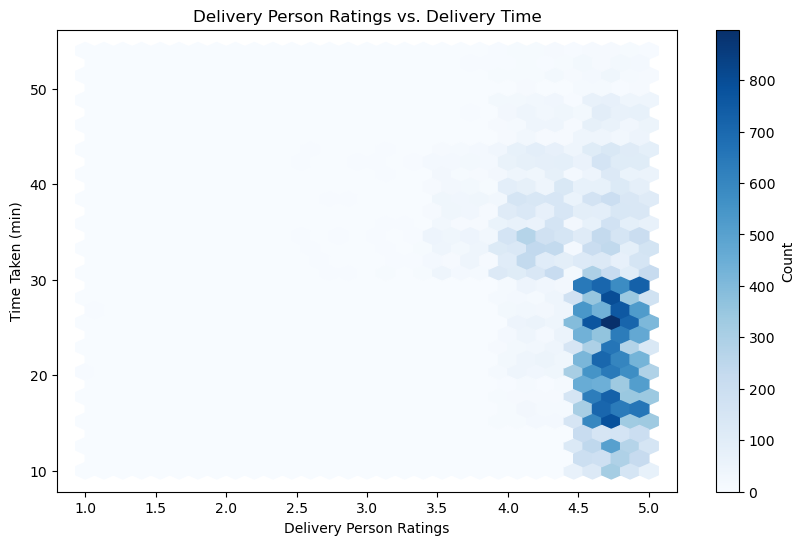

In [38]:
# To visulaize the density of points between delivery person ratings and delivery time
plt.figure(figsize=(10, 6))
plt.hexbin(df_cleaned['Delivery_person_Ratings'], df_cleaned['Time_taken(min)'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Delivery Person Ratings vs. Delivery Time')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Time Taken (min)')
plt.show()

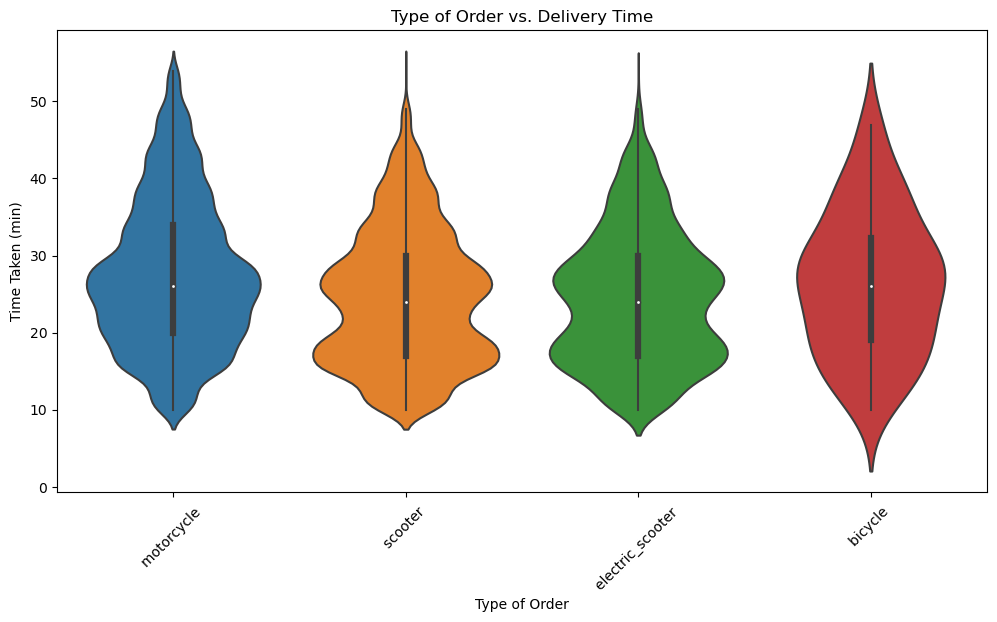

In [86]:
# Plot to visualize delivery time on the basis of type of vehicle

plt.figure(figsize=(12, 6))
sns.violinplot(x='Type_of_vehicle', y='Time_taken(min)', data=df)
plt.title('Type of Vehicle vs. Delivery Time')
plt.xlabel('Type of Order')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

### 7. Label Encoding

In [50]:
def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(df_cleaned)
df_cleaned.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Distance_km
0,37.0,4.9,4,0,2,3,2,0.0,0,2,...,5,0,0,0,0,0,0,1,15.0,3.0
1,34.0,4.5,3,1,2,3,3,1.0,0,0,...,4,0,0,0,0,0,0,0,5.0,20.0
2,23.0,4.4,2,2,0,1,2,1.0,0,2,...,5,0,0,0,0,0,0,1,15.0,2.0
3,38.0,4.7,4,3,0,0,2,1.0,0,0,...,1,0,0,0,0,0,0,0,10.0,8.0
4,32.0,4.6,0,0,1,3,3,1.0,0,0,...,5,0,0,0,0,0,0,1,15.0,6.0


### 8. Train Test Split

In [52]:
# Split features & label

X = df_cleaned.drop('Time_taken(min)', axis=1)  # Features
y = df_cleaned['Time_taken(min)']  # Target variable



In [53]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36104, 25)
(36104,)
(9027, 25)
(9027,)


### 9. Standardization

In [54]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train_scaled = scaler.transform(X_train)

# Perform standardization on the testing data
X_test_scaled = scaler.transform(X_test)

### 10. Model Building

In [55]:
# Find the best model
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {},  
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [100, 200, 300]},
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train_scaled, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

LinearRegression:
Best parameters: {}
Best R2 score: 0.49345594402101184

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.7342870598649387

RandomForestRegressor:
Best parameters: {'n_estimators': 300}
Best R2 score: 0.821971905806854

XGBRegressor:
Best parameters: {'max_depth': 7, 'n_estimators': 20}
Best R2 score: 0.8286977349631833



In [70]:
results = [
    ['LinearRegression', 0.49345594402101184],
    ['DecisionTreeRegressor', 0.7342870598649387],
    ['RandomForestRegressor',  0.821971905806854],
    ['XGBRegressor', 0.8286977349631833]
]

# Create a DataFrame from the results
df_results = pd.DataFrame(results, columns=['Model', 'Best_R2_Score'])
df_results.sort_values(by=['Best_R2_Score'], ascending=False)


,Model,Best_R2_Score
3,XGBRegressor,0.828698
2,RandomForestRegressor,0.821972
1,DecisionTreeRegressor,0.734287
0,LinearRegression,0.493456


### 11. Model Selection

In [56]:
# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=20,max_depth=9)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 12. Model Evaluation

In [61]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r_squared = 1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))
print("Adj R-square:",round(adjusted_r_squared,2)) 

Mean Absolute Error (MAE): 3.1
Mean Squared Error (MSE): 15.17
Root Mean Squared Error (RMSE): 3.9
R-squared (R2) Score: 0.83
Adj R-square: 0.83


In [67]:
# New DataFrame Comparing the values of Actual Time Taken vs Predicted Time
new_df = pd.DataFrame()

new_df['Actual_Time'] = y_test
new_df['Pred_Time'] = y_pred
new_df['Residual'] = new_df['Actual_Time'] - new_df['Pred_Time']

new_df.head(10)


,Actual_Time,Pred_Time,Residual
6299,24,26.980595,-2.980595
25460,34,33.689251,0.310749
18051,11,13.815636,-2.815636
5313,17,17.911182,-0.911182
26145,30,29.396381,0.603619
5831,17,15.238465,1.761535
25205,22,24.766466,-2.766466
36526,28,28.970085,-0.970085
6999,39,37.486977,1.513023
16871,27,24.285419,2.714581


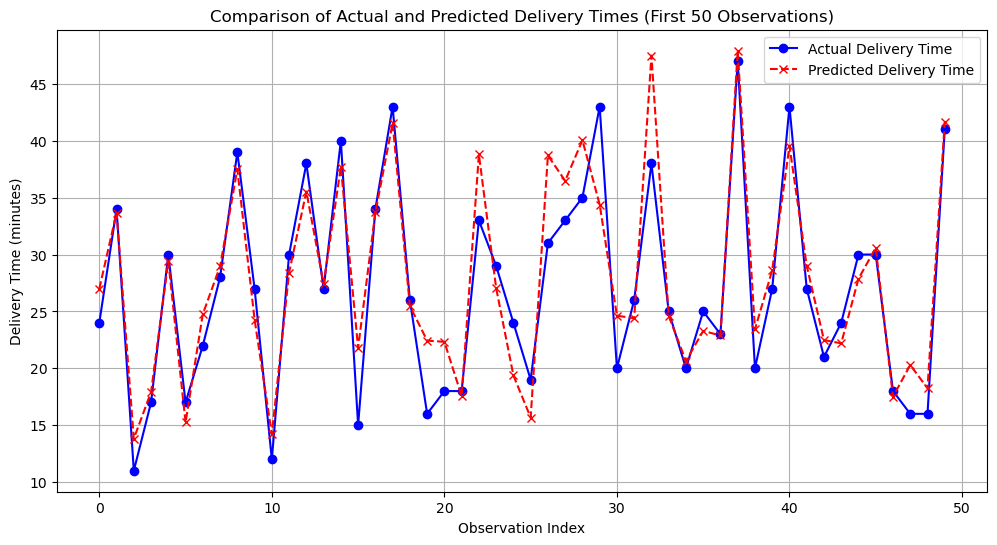

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.head(50).values, label='Actual Delivery Time', marker='o', linestyle='-', color='b')
plt.plot(y_pred[:50], label='Predicted Delivery Time', marker='x', linestyle='--', color='r')
plt.title('Comparison of Actual and Predicted Delivery Times (First 50 Observations)')
plt.xlabel('Observation Index')
plt.ylabel('Delivery Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

### XGBRegressor has been chosen as the final model for predicting food delivery times due to its superior performance over other models. It consistently outperformed other models, achieving the highest R-squared value, indicating the best fit and accuracy. XGBRegressor’s superior accuracy and robustness make it the optimal choice for our food delivery time prediction model, enhancing operational efficiency and decision-making.
 
